In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


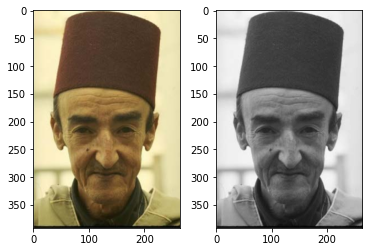

In [3]:
img = cv2.imread('/content/drive/MyDrive/Projects/Computer Vision/Cartoonify/Samples/1.jpg')

rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(rgbImg)
axarr[1].imshow(grayImg, cmap = "gray")

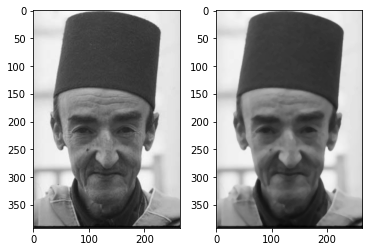

In [4]:
medianImg = cv2.medianBlur(grayImg, ksize=5)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(grayImg, cmap = "gray")
axarr[1].imshow(medianImg, cmap = "gray")

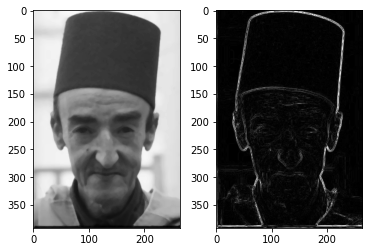

In [5]:
laplacianImg = cv2.Laplacian(medianImg, cv2.CV_16S, ksize=3)
laplacianImg = cv2.convertScaleAbs(laplacianImg)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(medianImg, cmap = "gray")
axarr[1].imshow(laplacianImg, cmap = "gray")

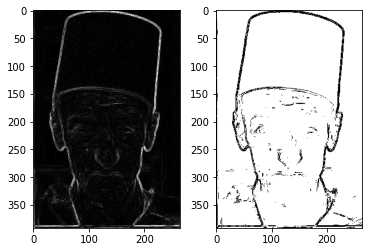

In [6]:
ret, thresholdImg = cv2.threshold(laplacianImg, 40, 255, cv2.THRESH_BINARY_INV)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(laplacianImg, cmap = "gray")
axarr[1].imshow(thresholdImg, cmap = "gray")

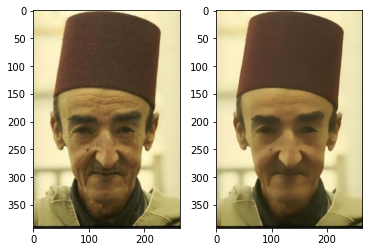

In [7]:
bilateralImg = cv2.bilateralFilter(rgbImg, 15, 50, 50)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(rgbImg)
axarr[1].imshow(bilateralImg)

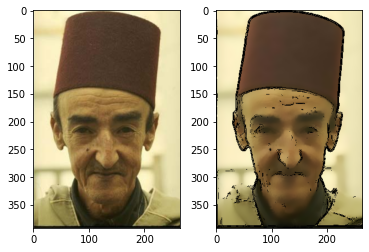

In [8]:
thresholdImg = cv2.cvtColor(thresholdImg, cv2.COLOR_GRAY2RGB)

redMask = cv2.bitwise_and(bilateralImg, thresholdImg)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(rgbImg)
axarr[1].imshow(redMask)